In [1]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

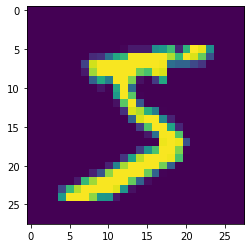

label 5
dimention (28, 28)


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
plt.imshow(X_train[0])
plt.show()

print(f'label {Y_train[0]}')
print(f'dimention {X_train[0].shape}')

In [3]:
train_size = X_train.shape[0]
img_size = X_train[0].shape[0]
train_size, img_size

(60000, 28)

In [4]:
# generator = keras.Model(
#     layers=[
#         Input(shape=(128,)),
#         Dense(256, activation='relu'),
#         Dense(512, activation='relu'),
#         Dense(28 * 28, activation='relu')
#     ]
# )

inputs = Input(shape=(128,))

layers = Dense(256, activation='relu')(inputs)
layers = Dense(512, activation='relu')(layers)
layers = Dense(28 * 28, activation='relu')(layers)

generator = keras.Model(inputs=inputs, outputs=layers, name='generator')
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               402192    
Total params: 566,800
Trainable params: 566,800
Non-trainable params: 0
_________________________________________________________________


In [5]:
# generator.compile(
#     loss='binary_crossentropy', 
#     optimizer=keras.optimizers.Adam(lr=0.0002), 
#     metrics=['mae']
# )

In [6]:
# discriminator = keras.Model(
#     layers=[
#         Input(shape=(28 * 28,)),
#         Dense(1048, activation='relu'),
#         Dense(248, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ]
# )
# discriminator.summary()


inputs = Input(shape=(28 * 28,))

layers = Dense(1048, activation='relu')(inputs)
layers = Dense(248, activation='relu')(layers)
layers = Dense(1, activation='sigmoid')(layers)

discriminator = keras.Model(inputs=inputs, outputs=layers, name='discriminator')
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1048)              822680    
_________________________________________________________________
dense_4 (Dense)              (None, 248)               260152    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 249       
Total params: 1,083,081
Trainable params: 1,083,081
Non-trainable params: 0
_________________________________________________________________


In [7]:
discriminator.compile(
    loss='binary_crossentropy', 
    optimizer=keras.optimizers.Adam(lr=0.0002), 
    metrics=['mae']
)

/home/viking/Programing-stuff/ml-workshop/venv/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
# gan = discriminator(generator)
# gan.summary()

In [9]:
gan = keras.Sequential()
gan.add(generator)
gan.add(discriminator)
discriminator.trainable = False
gan.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Functional)       (None, 784)               566800    
_________________________________________________________________
discriminator (Functional)   (None, 1)                 1083081   
Total params: 1,649,881
Trainable params: 566,800
Non-trainable params: 1,083,081
_________________________________________________________________


In [10]:
gan.compile(
    loss='binary_crossentropy', 
    optimizer=keras.optimizers.Adam(lr=0.0002), 
    metrics=['mae']
)

/home/viking/Programing-stuff/ml-workshop/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 59999 + 1) instead
  


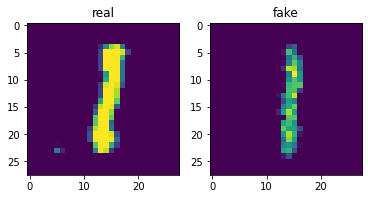

In [98]:
def draw_sample():
        real_img = X_train[np.random.random_integers(train_size - 1)]
        fake_img = generator.predict(np.random.rand(1,128))
        
        fig, axs = plt.subplots(1, 2)
        
        axs[0].imshow(real_img)
        axs[0].set_title('real')
        
        axs[1].imshow(fake_img.reshape((img_size, img_size)))
        axs[1].set_title('fake')

        plt.show()

draw_sample()

In [84]:
def train_discriminator(iterations_num, batch_size):
    
#     print(f'metrics: {discriminator.metrics_names}')
    for i in range(iterations_num):
        random_sample = np.random.random_integers(train_size - 1, size=(batch_size,))
        real_images = np.array([x.reshape(-1,) for x in X_train[random_sample]])
        fake_images = generator.predict(np.random.rand(batch_size,128))
        
        discriminator.fit(real_images, np.ones(batch_size), verbose=0)
        discriminator.fit(fake_images, np.zeros(batch_size), verbose=0)

train_discriminator(2, 10)

/home/viking/Programing-stuff/ml-workshop/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 59999 + 1) instead
  """


In [85]:
def train_generator(iterations_num, batch_size):
    
#     print(f'metrics: {gan.metrics_names}')
    for i in range(iterations_num):
        gan.fit(np.random.rand(batch_size,128), np.ones(batch_size), verbose=0)

train_generator(2, 10)

In [86]:
def train_loop(iter_num, epochs_num, batch_size=100, drawing_interval = 10):
    i = 0
    while i < epochs_num:
        train_discriminator(iter_num, batch_size)
        train_generator(iter_num, batch_size)
        
        if i % drawing_interval == 0:
            draw_sample()
        
        i += 1

In [111]:
epochs_num = 10
iter_num = 100
batch_size = 2000

In [112]:
train_loop(iter_num, epochs_num, batch_size)

/home/viking/Programing-stuff/ml-workshop/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 59999 + 1) instead
  """


KeyboardInterrupt: 

/home/viking/Programing-stuff/ml-workshop/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 59999 + 1) instead
  


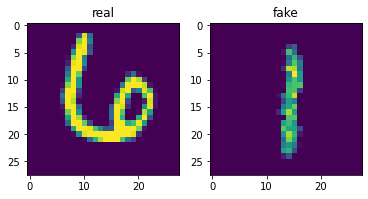

In [94]:
draw_sample()

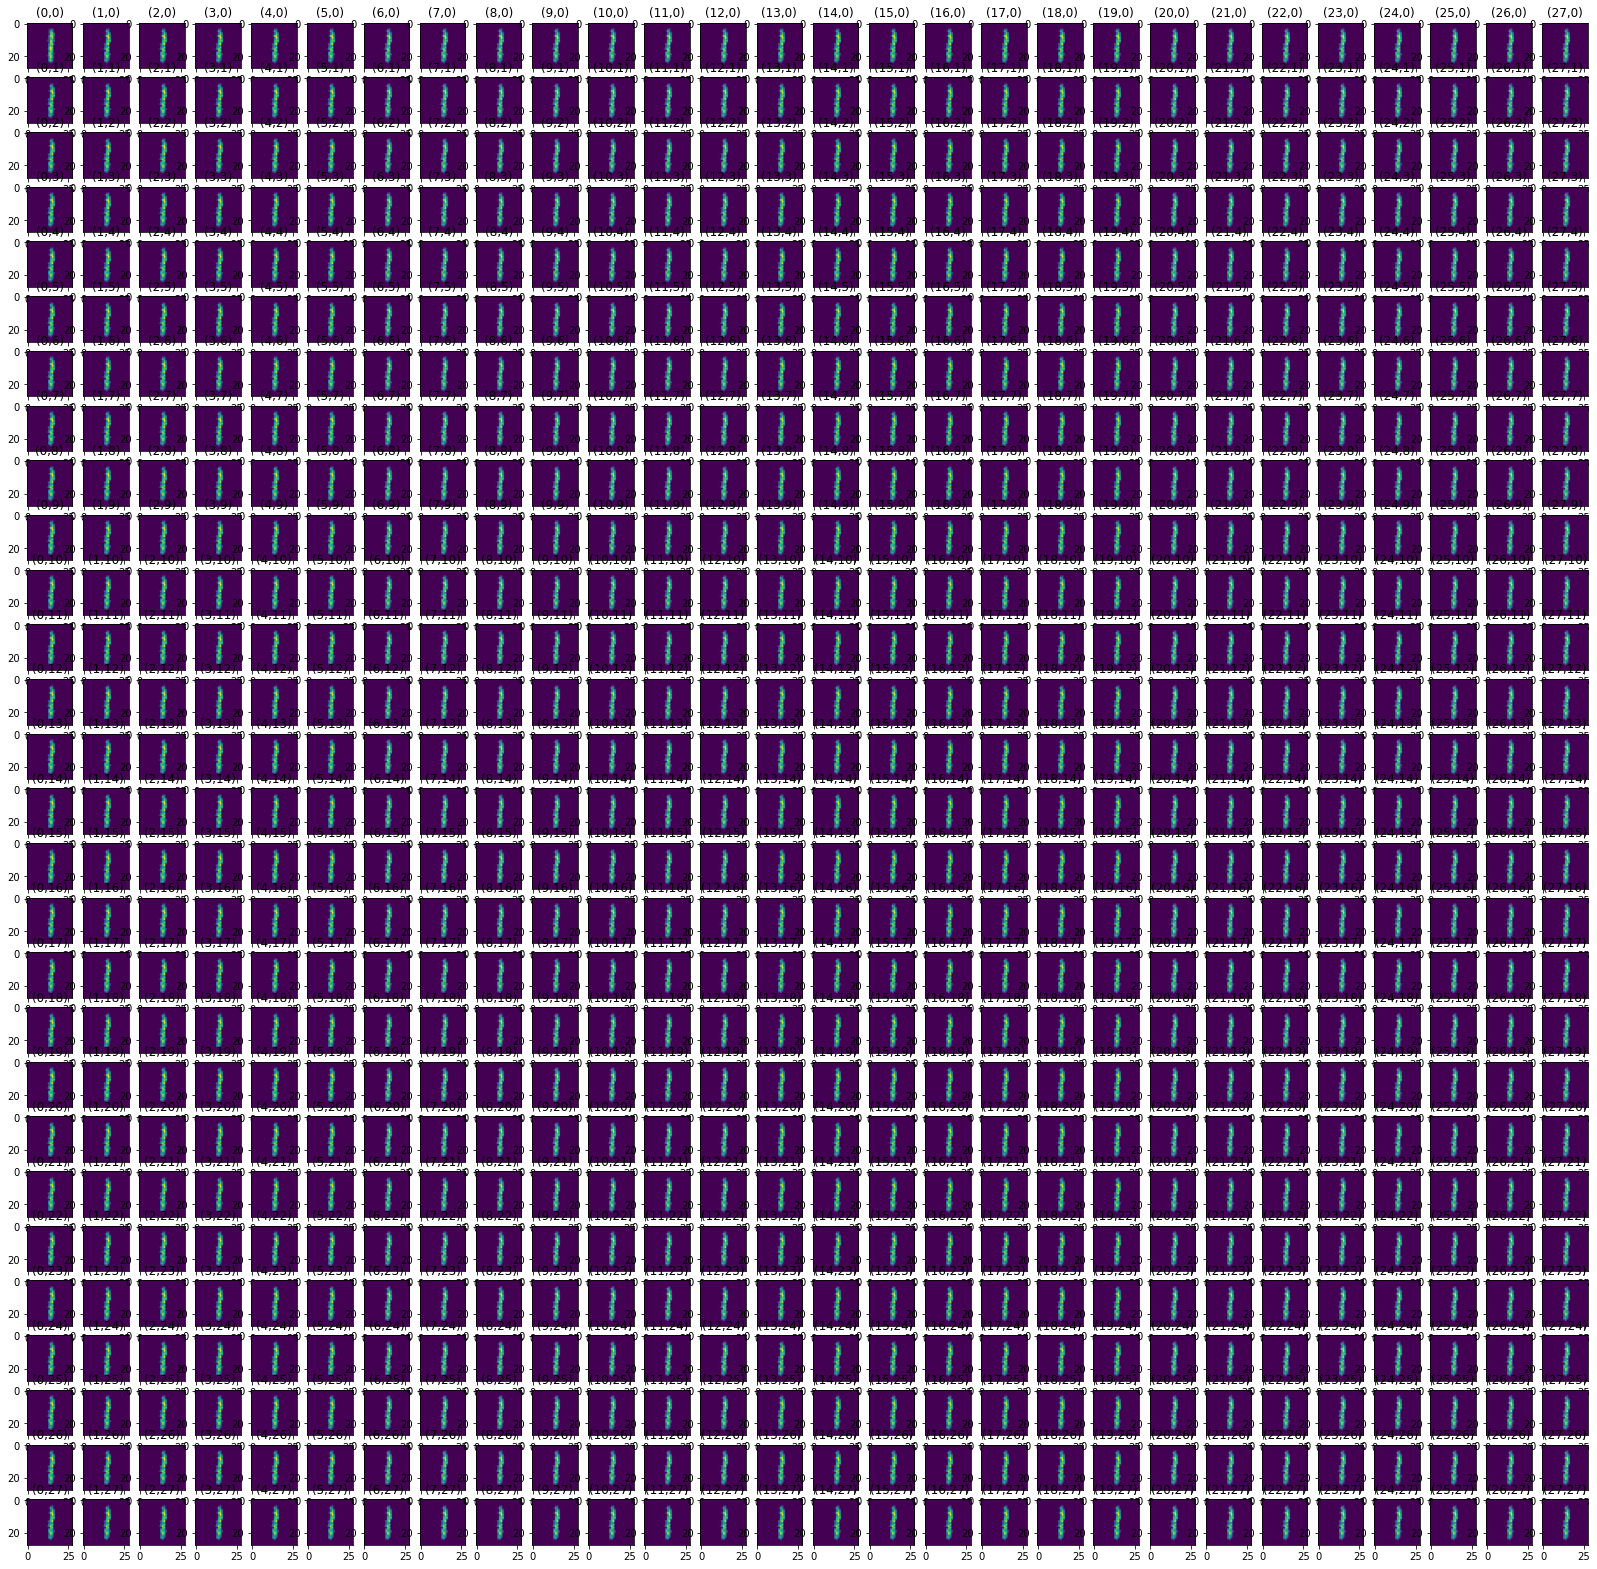

In [110]:
def draw_space():
        fig, axs = plt.subplots(28, 28)
        fig.set_figwidth(56)
        fig.set_figheight(56)        

        for y, row in enumerate(axs):
            for x, ax in enumerate(row):
                fake_img = generator.predict(np.full(128, x + y * 28).reshape(1,-1))
                ax.imshow(fake_img.reshape((img_size, img_size)))

        plt.show()

draw_space()